#latihan sklearn dengan teknik grid search


In [ ]:
import pandas as pd

data = pd.read_csv("Salary_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
import numpy as np

#memisahkan atribut dan label
X = data["YearsExperience"]
y = data["Salary"]

#mengubah bentuk atribut
X = X[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

#membuat model dengan parameter C,gamma ,dan kernel
model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.5, 0.05,0.005]
}
search_grid = GridSearchCV(model, parameters)

#latih model
search_grid.fit(X, y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [ ]:
#menampilkan parameter terbaik dari objek grid_search
print(search_grid.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [ ]:
#membuat model baru berdasarkan parameter terbaik
model_baru = SVR(C=100000, gamma=0.005, kernel="rbf")
model_baru.fit(X, y)

SVR(C=100000, gamma=0.005)

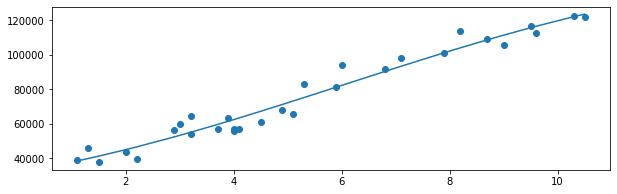

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))